In [ ]:
%%bigquery schema --table "dancedeets-hrd:dance_events.dance_events"

In [69]:
%%sql --module date_held
SELECT YEAR(start_time) + WEEK(start_time)/52 as date, COUNT(*) as count
FROM [dancedeets-hrd:dance_events.dance_events]
WHERE start_time > '2010-06-01 00:00' AND start_time < CURRENT_TIMESTAMP()
GROUP BY date ORDER BY date;

In [72]:
%%sql --module date_held_future
SELECT YEAR(start_time) + WEEK(start_time)/52 as date, COUNT(*) as count
FROM [dancedeets-hrd:dance_events.dance_events]
WHERE start_time > CURRENT_TIMESTAMP() AND start_time < DATE_ADD(CURRENT_TIMESTAMP(), 1, "YEAR")
GROUP BY date ORDER BY date;

In [101]:
%%sql --module date_added
SELECT YEAR(creation_time) + WEEK(creation_time)/52 as date, IF(COUNT(*) < 1000,COUNT(*),1000) as count
FROM [dancedeets-hrd:dance_events.dance_events]
WHERE creation_time > '2010-06-01 00:00'
GROUP BY date ORDER BY date;

In [93]:
%%sql --module styles
SELECT auto_categories, COUNT(auto_categories) as count
FROM [dancedeets-hrd:dance_events.dance_events]
WHERE auto_categories in ('BREAK', 'HIPHOP', 'HOUSE', 'POP', 'LOCK', 'WAACK', 'DANCEHALL', 'VOGUE', 'KRUMP', 'ALLSTYLE')
GROUP BY auto_categories
ORDER BY count DESC
LIMIT 10

In [115]:
%%sql --module countries
SELECT country, COUNT(country) as count
FROM [dancedeets-hrd:dance_events.dance_events]
GROUP BY country
ORDER BY count DESC
LIMIT 10

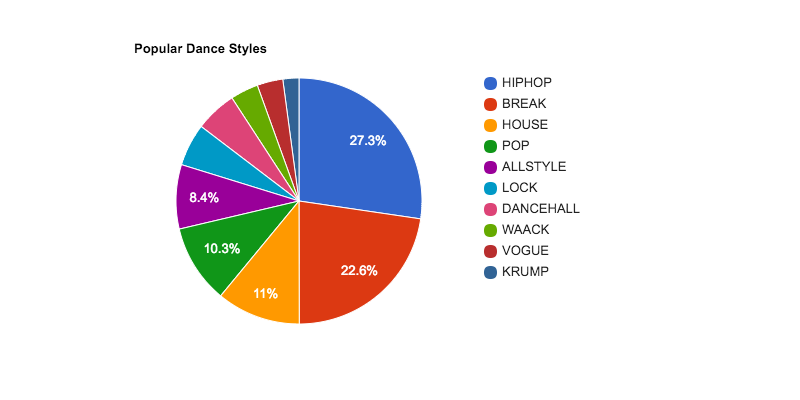

In [119]:
%%chart pie --fields auto_categories,count --data styles
title: "Popular Dance Styles"
width: 800
height: 400

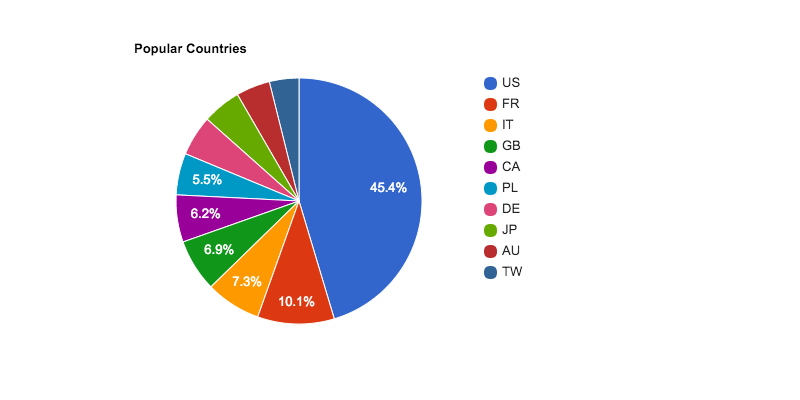

In [121]:
%%chart pie --fields country,count --data countries
title: "Popular Countries"
width: 800
height: 400

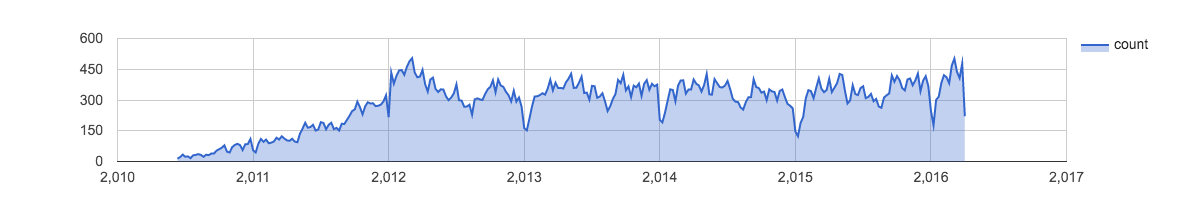

In [123]:
%%chart area --fields date,count --data date_held
hAxis: {
    ticks: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
}

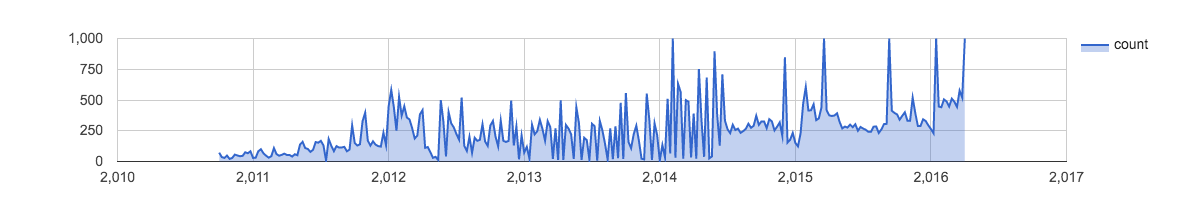

In [106]:
%%chart area --fields date,count --data date_added
hAxis: {
    ticks: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
}


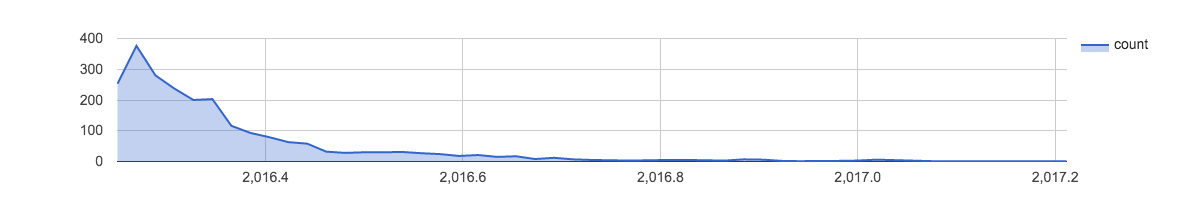

In [108]:
%%chart area --fields date,count --data date_held_future


In [223]:
%%bigquery execute
// Top Event Submittors
SELECT creating_fb_uid, COUNT(*) as count FROM dance_events.dance_events group by creating_fb_uid order by count DESC LIMIT 15;


QueryResultsTable job__V6I6KB7bACTCqss4yTOnZHrFh8

In [226]:
%%bigquery execute
// Top Event Submittors
SELECT owner_fb_uid, COUNT(*) as count FROM dance_events.dance_events group by owner_fb_uid order by count DESC LIMIT 15;


QueryResultsTable job_1RmqZOzyCZOwwVvcFnqLYDF94Cg

In [241]:
%%bigquery execute
SELECT FLOOR(attendee_count/10)*10 as count, (count*) as count FROM dance_events.dance_events group by attendee_count order by attendee_count LIMIT 15;


QueryResultsTable job_UCK56eBm3NoCTDVpldBI1CnxG2U

In [240]:
%%sql --module attendees
SELECT __key__.name, attendee_count
FROM dance_events.dance_events
WHERE attendee_count < 10000;


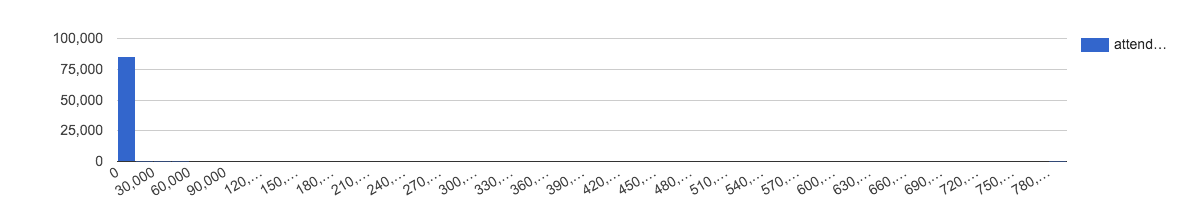

In [238]:
%%chart histogram --data attendees


In [218]:
%%sql --module geo

DEFINE QUERY locations
  SELECT FLOAT(latitude) AS lat, FLOAT(longitude) AS lon, __key__.name as id, city_name
  FROM [dancedeets-hrd:dance_events.dance_events]
  WHERE latitude is NOT NULL

DEFINE QUERY hotspots_temp
  SELECT FIRST(lat) AS lat, FIRST(lon) AS lon, CONCAT(FIRST(city_name), ': ', STRING(COUNT(id)), ' events') AS title, COUNT(id) as event_count
  FROM $locations
  GROUP BY city_name
  ORDER BY event_count DESC
  LIMIT 20


In [219]:
%%chart map --fields lat,lon,title --data geo
showTip: true
mapType: normal

In [220]:
%%bigquery execute --query geo

QueryResultsTable job_ORugLWmHfBfZcVei4TRNeJA9hU8